In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

In [3]:
# Chargement des données
raw_data = pd.read_csv('house_data.csv')

In [4]:
# Résumé des données brutes
raw_data.describe()

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


In [5]:
# Il y a quelques valeurs manquantes, on supprime ces lignes
data_na = raw_data.dropna()

# Comme vu dans le TP, on a des outliers sur les grands propriétés
data = data_na[data_na["price"] < 8000]

# On reindexe
data = data.reset_index(drop = True)

<AxesSubplot: xlabel='price', ylabel='surface'>

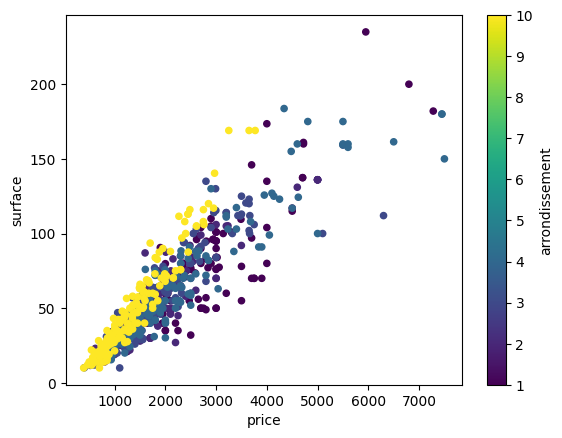

In [6]:
# On affiche les données nettoyées
data.plot.scatter("price", "surface", c="arrondissement", colormap='viridis')

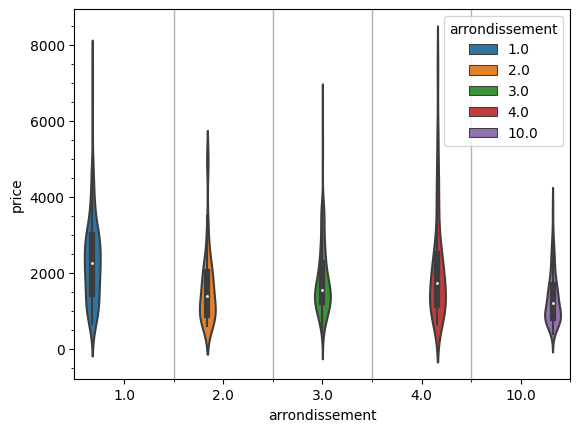

In [10]:
ax1 = sns.violinplot(x="arrondissement", y="price", data=data, hue='arrondissement')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

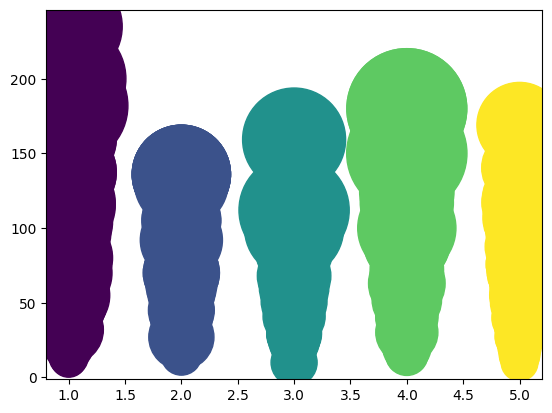

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure().gca()

# Pour faciliter la visualisation, on va changer la valeur de l'arrondissement (10)
tmp_arr = data['arrondissement'][:]
tmp_arr[tmp_arr == 10] = 5

fig.scatter(tmp_arr, data['surface'], data['price'], c=tmp_arr, cmap="viridis")
plt.show()

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(data[["surface", "arrondissement"]], data[["price"]], test_size=0.3)

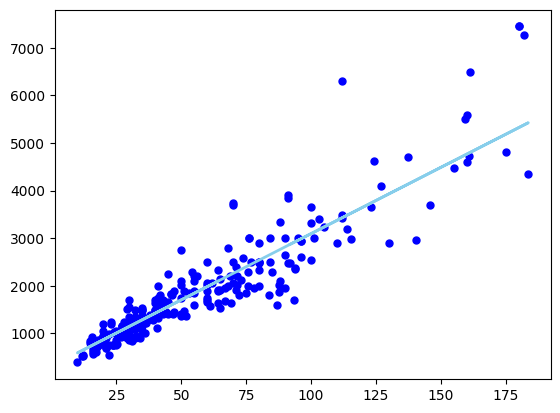

In [15]:
lr = LinearRegression()
lr_baseline = lr.fit(xtrain[["surface"]], ytrain)
baseline_pred = lr_baseline.predict(xtest[["surface"]])

plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], baseline_pred, color="skyblue", linewidth = 2)